# EP01 da disciplina de Visão e Processamento de Imagens
## (MAC5768/MAC0417 -- 2020)

|Nomes:                        | N° USP:|
|------------------------------|--------|
|Alana Ilen Cermak             | 10737967|
|Francisco Edvar da Cunha Filho | 10656115|
|Marcos Markevich              | 11373435|

Link para pasta no drive: https://drive.google.com/drive/folders/1Qc0gAhNhfqMOcWeW5aDH7WcEgftJjq12?usp=sharing

Link para o github do grupo: https://github.com/franciscoedvar/EPs_Visao_Computacional

<p>
O trabalho que segue é uma base de dados com 888 imagens, realizado como EP1 da matéria MAC0417/5768 - Visão e Processamento de Imagens, ministrada pelo professor Roberto Marcondes Cesar Junior, IME-USP. As imagens correspondem a 10 classes diferentes de objetos cotidianos. O programa faz um apêndice das fotos e gera uma tabela mnist aleatória com a nossa base de dados. </p>

In [1]:
from google_drive_downloader import GoogleDriveDownloader as gdd
from skimage.io import imread, imsave
from skimage.util import img_as_ubyte
from skimage.transform import resize
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
import csv
import os

https://drive.google.com/file/d/1OoGOJ84MAC454rX72lpKmpJXXC2Y4FCB/view?usp=sharing

In [2]:
#Utilização da biblioteca Google Drive Downloader para baixar e extrair os dados do EP01.
gdd.download_file_from_google_drive(file_id='1OoGOJ84MAC454rX72lpKmpJXXC2Y4FCB',
                                    dest_path='./dados.zip',
                                    unzip=True,
                                    showsize=True)

#Localização dos arquivos
os.chdir('./dados/Fotos_1280_720')
csv_path = "./../Dados Imagens.csv"
csv_file = pd.read_csv(csv_path)

In [3]:
def getsizes(pasta):
    # Pega os tamanhos das pastas
    tam = 0
    for arquivo in os.scandir(pasta):
        if arquivo.is_file:
            tam += arquivo.stat().st_size
        else:
            tam += getsizes(pasta + '/' + arquivo)
    return tam

def getobj(objetosid):
    # Tira o nome do objeto da string do csv
    return objetosid.split('_')[2]

def norepeat(array):
    # Retorna uma lista sem repetições
    res = []
    [res.append(x) for x in array if x not in res]
    return res

def TabelaSumaria():
    list_img = os.listdir()
    classes = {x.split('.')[1]: x for x in list_img}
    sizes = list(map(getsizes, list_img))
    folder = random.choice(list_img)
    resolution = read_imgs(folder)
    resolution = np.shape(resolution)
    print('=================================== \n')
    print('\033[1mTabela Global Sumária \033[0m \n')
    print('Nome do Atributo | Atributo')
    print('Número de classes | ' + str(len(classes)))
    print('Número de imagens | ' + str(len(csv_file)))
    print('Tamanho da base (bytes) | ' + str(round(np.sum(sizes)/1000000,2)) + ' MB')
    print('Resolução das imagens | %s linhas por %s colunas' %(resolution[1], resolution[2]))
    print('=================================== \n')
    print('\033[1mTabela detalhada por classe \033[0m \n')
    print('Nome do objeto | Características das amostras \n')
    list(map(TabelaSumariaClasse, classes))

def TabelaSumariaClasse(nome):
    # Formato o nome para tirar espaços
    nome = nome.split()[0]

    # Crio uma tabela nova contendo apenas a classe desejada
    tabela = csv_file[csv_file['Classe']== nome]

    # Pego o numero de objetos
    objetos = tabela['Objetos'].tolist()
    objetos = list(map(getobj, objetos))
    objetosnum = len(norepeat(objetos))

    # Pego o número de fundos e uma tuple com todos os fundos
    fundos = tabela['Fundo'].tolist()
    fundos = norepeat(fundos)
    tiposfundos = tuple(fundos)
    fundosnum = len(fundos)

    # Conto as variações de iluminação sendo Tempo x Lugar
    ilumidia = tabela['0 De dia / 1 De noite'].tolist()
    ilumilugar = tabela['0 Dentro / 1 Fora de Casa'].tolist()
    iluminum = len(norepeat(ilumilugar))*len(norepeat(ilumidia))

    # Conto as repetições
    repeti = tabela['Repetição'].tolist()
    repetinum = len(norepeat(repeti))

    # Conto as mostras
    mostras = len(tabela)

    print('''| \033[1m%s\033[0m |\n
| %s Objetos | \n
| %s Variações de fundo %s | \n 
| %s Variações de iluminação (Dentro/Fora x Dia/Noite) | \n
| %s Repetições | \n
| %s Amostras | \n''' %(nome, objetosnum, fundosnum, tiposfundos, iluminum, repetinum, mostras)) 
    return

def read_imgs(img_folder, sample_size=1):
    all_imgs = os.listdir(img_folder)
    all_imread = []
    all_imgs = random.sample(all_imgs, sample_size)
    for i in range(len(all_imgs)):
        all_imread.append(imread(img_folder+'/'+all_imgs[i]))

    return all_imread


### converte formato da imagem para a resolução informada
def convert_img(img_path,img_path_save,res=(1280,720)):
    img = imread(img_path)
    img_res = img_as_ubyte(resize(img,res))
    imsave(img_path_save,img_res)
    print('OK: '+ img_path_save)
    return

### criar opções para chamar a read_imgs 
def mnist_like_plot(img_per_row = 10, sample_size= 100, img_root = './',  **options):
  
    all_imgs = imgs_mnist(sample_size, img_root)
    imgs = all_imgs 
    num_img_per_row = min(len(imgs), img_per_row)
    num_rows = (len(imgs) - 1) // num_img_per_row + 1
    all_rows = []
    for i in range(num_rows):
        row = all_imgs[ i * num_img_per_row : (i + 1) * num_img_per_row]
        all_rows.append(np.concatenate(row, axis=1))
    img_grid = np.concatenate(all_rows, axis = 0)
    plt.figure(figsize=(15,25))
    plt.imshow(img_grid, **options)
    plt.axis('off')
    
    del img_grid
    return 

def imgs_mnist(sample_size,root_dir = './'):
    all_imgs = [os.path.join(root, name)
                 for root, dirs, files in os.walk(root_dir)
                 for name in files
                 if name.endswith((".jpg"))] 
    all_imread = []
    all_imgs = random.sample(all_imgs, sample_size)
    for i in range(len(all_imgs)):
        all_imread.append(imread(root_dir+all_imgs[i]))

    return all_imread



In [4]:
TabelaSumaria()



Tabela Global Sumária  

Nome do Atributo | Atributo
Número de classes | 10
Número de imagens | 888
Tamanho da base (bytes) | 77.79 MB
Resolução das imagens | 1280 linhas por 720 colunas

Tabela detalhada por classe  

Nome do objeto | Características das amostras 

| Caneca |

| 5 Objetos | 

| 3 Variações de fundo ('Mesa e parede', 'Tatame vermelho', 'Banco cinza') | 
 
| 4 Variações de iluminação (Dentro/Fora x Dia/Noite) | 

| 3 Repetições | 

| 60 Amostras | 

| Folha |

| 10 Objetos | 

| 3 Variações de fundo ('Chão de madeira', 'Azul', 'Banco de madeira') | 
 
| 4 Variações de iluminação (Dentro/Fora x Dia/Noite) | 

| 3 Repetições | 

| 120 Amostras | 

| Garfo |

| 6 Objetos | 

| 3 Variações de fundo ('Mesa e parede', 'Tatame vermelho', 'Banco cinza') | 
 
| 4 Variações de iluminação (Dentro/Fora x Dia/Noite) | 

| 3 Repetições | 

| 72 Amostras | 

| Isqueiro |

| 7 Objetos | 

| 3 Variações de fundo ('Branco', 'Textura vermelha', 'Janela fora de casa') | 
 
| 4 Variações d

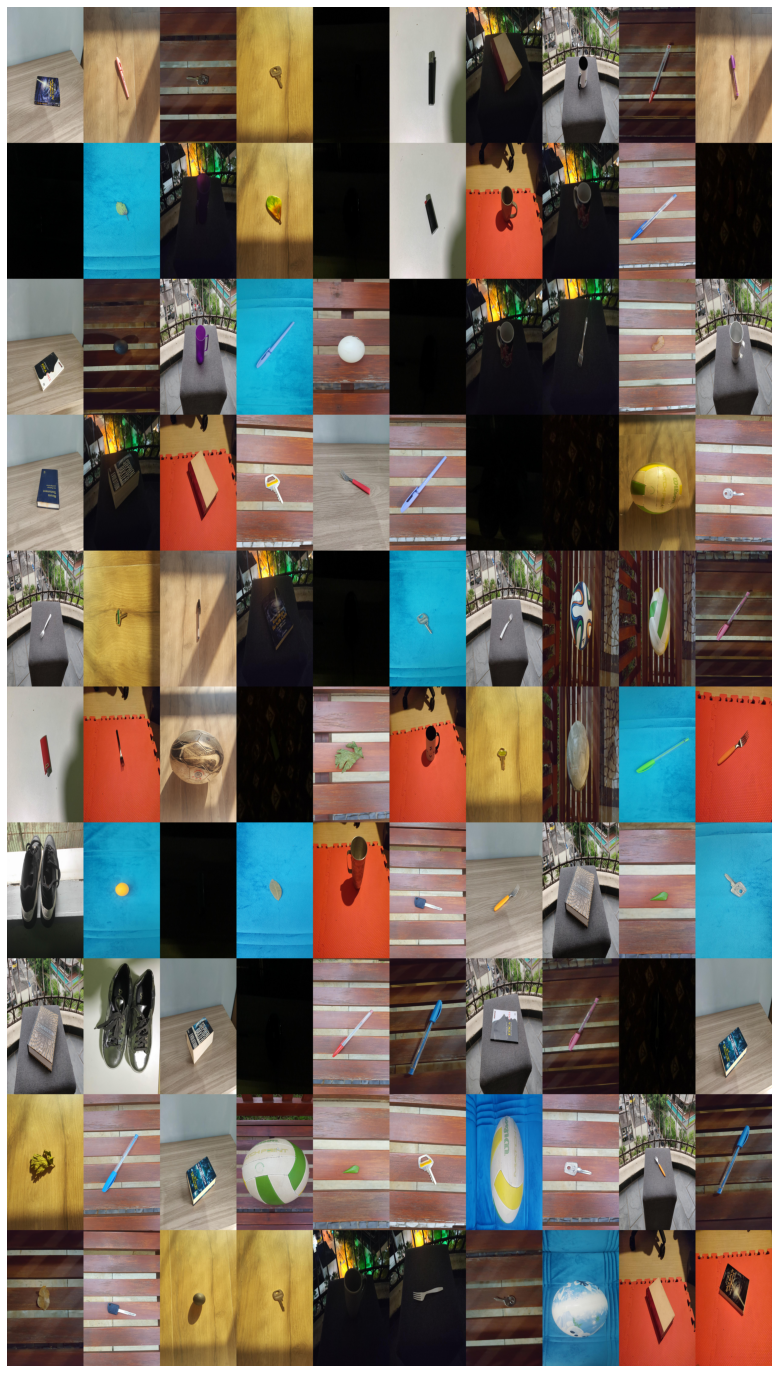

In [5]:
mnist_like_plot()